**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 2**

**Problem 2.16**


**Estimate the global irradiance G(α,β) reaching the plane of array (POA) of a north-facing, 20° tilted generator over grass (reflectivity=0.2) located at a PV plant in Antananarivo, Madagascar (18° 56′ 0″ S, 47° 31′ 0″ E) at midday (true solar time) on May 12, 2022.**

**Solve the problem using pvlib-python and selecting the same day from the typical meteorological year (TMY) obtained from PVGIS.**

We will use the packages [pvlib](https://pvlib-python.readthedocs.io/en/stable/), [pandas](https://pandas.pydata.org/) and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results.


In [1]:
import pvlib
import pandas as pd
import matplotlib.pyplot as plt

We start by defining the location, date and time. 
We will implement the calculation for every hour on May 12, 2022. 

In [5]:
# Antananarivo, Madagascar
lat, lon = 18.93, 47.52
tz = 'Indian/Antananarivo' #existing timezones can be checked using pytz.all_timezones[::20]

date = '2022-05-12'

# surface angles beta, alpha
tilt, orientation = 20, 0 # pvlib sets orientation origin at North -> North=0

# location
location = pvlib.location.Location(lat, lon, tz=tz)

# albedo
albedo = 0.20 # grass reflectivity

# datetimes
times = pd.date_range(start=date, freq='1H', periods=24, tz=tz)

Retrieve typical meteorological year (TMY) data from PVGIS.

In [6]:
tmy, _, _, _ = pvlib.iotools.get_pvgis_tmy(latitude=lat, longitude=lon, map_variables=True)
tmy.index = [ts.replace(year=2022) for ts in tmy.index] # homogenizes year to 2022

tmy.index = tmy.index.tz_convert(tz) # use local time

# select the hourly values corresponding to the day=May 12
tmy_day = tmy.loc[date]

We calculate the Sun's coordinates and calculate the irradiance on the plane of array (POA)

In [7]:
# calculates Sun's coordinates
solar_position_tmy = location.get_solarposition(times=tmy_day.index)

poa_fixed_tmy_irradiance = pvlib.irradiance.get_total_irradiance(
    surface_tilt=tilt,
    surface_azimuth=orientation,
    dni=tmy_day['dni'],
    ghi=tmy_day['ghi'],
    dhi=tmy_day['dhi'],
    solar_zenith=solar_position_tmy['apparent_zenith'],
    solar_azimuth=solar_position_tmy['azimuth'])


We can plot the daily evolution of direct, diffuse, and global irradiance

Text(0, 0.5, 'Irradiance [$W/m^2$]')

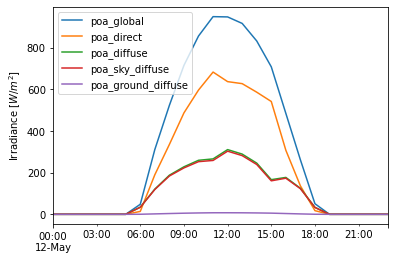

In [8]:
poa_fixed_tmy_irradiance.plot()
plt.ylabel('Irradiance [$W/m^2$]')

And obtain the value at midday. 

In [9]:
poa_fixed_tmy_irradiance.loc[poa_fixed_tmy_irradiance.index[12]]

poa_global            948.896516
poa_direct            637.826352
poa_diffuse           311.070164
poa_sky_diffuse       303.561895
poa_ground_diffuse      7.508269
Name: 2022-05-12 12:00:00+03:00, dtype: float64

We can also obtain the values at any other time step.

In [10]:
poa_fixed_tmy_irradiance

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
2022-05-12 00:00:00+03:00,0.000000,-0.000000,0.000000,0.000000,0.000000
2022-05-12 01:00:00+03:00,0.000000,-0.000000,0.000000,0.000000,0.000000
2022-05-12 02:00:00+03:00,0.000000,-0.000000,0.000000,0.000000,0.000000
2022-05-12 03:00:00+03:00,0.000000,-0.000000,0.000000,0.000000,0.000000
2022-05-12 04:00:00+03:00,0.000000,-0.000000,0.000000,0.000000,0.000000
2022-05-12 05:00:00+03:00,0.000000,0.000000,0.000000,0.000000,0.000000
2022-05-12 06:00:00+03:00,48.175092,13.921395,34.253696,33.944621,0.309075
2022-05-12 07:00:00+03:00,311.618935,190.277388,121.341547,119.291096,2.050451
2022-05-12 08:00:00+03:00,523.917955,335.893022,188.024933,184.270799,3.754134
2022-05-12 09:00:00+03:00,716.014292,487.589822,228.424470,223.064651,5.359818
